<a href="https://colab.research.google.com/github/muresan-gabriel/graph-repo/blob/main/graphviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Minimal

In [ ]:
from graphviz import Digraph

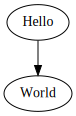

In [ ]:
g = Digraph('G')
g.edge('Hello', 'World')
g

In [ ]:
type(g)

graphviz.dot.Digraph

In [ ]:
# dir(g)
g._repr_svg_()

'<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Generated by graphviz version 2.40.1 (20161225.0304)\n -->\n<!-- Title: G Pages: 1 -->\n<svg width="77pt" height="116pt"\n viewBox="0.00 0.00 76.89 116.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 112)">\n<title>G</title>\n<polygon fill="#ffffff" stroke="transparent" points="-4,4 -4,-112 72.8939,-112 72.8939,4 -4,4"/>\n<!-- Hello -->\n<g id="node1" class="node">\n<title>Hello</title>\n<ellipse fill="none" stroke="#000000" cx="34.4469" cy="-90" rx="31.3957" ry="18"/>\n<text text-anchor="middle" x="34.4469" y="-86.3" font-family="Times,serif" font-size="14.00" fill="#000000">Hello</text>\n</g>\n<!-- World -->\n<g id="node2" class="node">\n<title>World</title>\n<ellipse fill="none" stroke="#000000" cx="34.4469" cy="-1

## Dot source

ดู [reference](https://www.graphviz.org/doc/info/lang.html), [guide.pdf](https://www.graphviz.org/pdf/Fdotguide.pdf)

In [ ]:
g.source

'digraph G {\n\tHello -> World\n}'

In [ ]:
from graphviz import Graph, Source

In [ ]:
# แบบไม่มีลูกศร
g = Graph('G')
g.edge('Hello', 'World')
g.source

'graph G {\n\tHello -- World\n}'

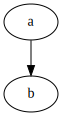

In [ ]:
Source("digraph A { a -> b }")

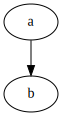

In [ ]:
# อ่านจากไฟล์
!echo "digraph A { a -> b }" > test.dot
Source.from_file('test.dot')

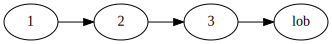

In [ ]:
Source('digraph "the holy hand grenade" { rankdir=LR; 1 -> 2 -> 3 -> lob }')

In [ ]:
g = Source("""digraph {
a -> b
a -> c
}""")
print(g.source)
type(g)

digraph {
a -> b
a -> c
}


graphviz.files.Source

## %%graph

In [ ]:
from graphviz import Source
from IPython.core.magic import register_cell_magic

@register_cell_magic
def graph(line, cell):
  src = "digraph {%s}" % cell
  g = Source(src)
  if line:
    name = line.split()[0]
    globals()[name] = g
  else:
    return g

In [ ]:
# save to a variable g
%%graph g
a -> b
a -> c

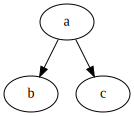

In [ ]:
g

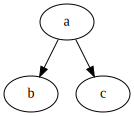

In [ ]:
# just display
%%graph
a -> b
a -> c

In [ ]:
type(g)

graphviz.files.Source

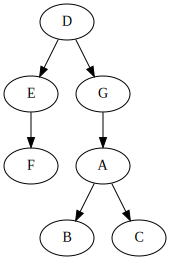

In [ ]:
%%graph
  subgraph {
    A -> B
    A -> C
  }
  subgraph {
    D -> E
    E -> F
  }
  subgraph {
    D -> G
    G -> A
  }

In [ ]:
g.source

'digraph {\na -> b\na -> c\n}'

## Merge

In [ ]:
%%graph ga
a -> c

In [ ]:
%%graph gb
b -> d

In [ ]:
ga.source + gb.source

'digraph {a -> c}digraph {b -> d}'

In [ ]:
g.source

'digraph {\na -> b\na -> c\n}'

มี 2 ทาง คือ แปลง digraph เป็น subgraph หรือเอา content ของอันหลัง ไปใส่ในอันแรก

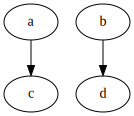

In [ ]:
# sub graph
sub1 = ga.source.replace('digraph', 'subgraph', 1)
sub2 = gb.source.replace('digraph', 'subgraph', 1)
Source("digraph {\n%s;\n %s;\n}" % (sub1, sub2))

In [ ]:
def add_source(self, other):
  sub1 = self.source.replace('digraph', 'subgraph', 1)
  sub2 = other.source.replace('digraph', 'subgraph', 1)
  return Source("digraph {\n%s;\n %s;\n}" % (sub1, sub2))
Source.__add__ = add_source

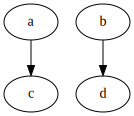

In [ ]:
ga + gb

In [ ]:
%%graph g1
a -> b

In [ ]:
%%graph g2
a -> c

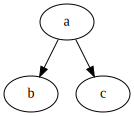

In [ ]:
# merge สำเร็จแล้ว
g1 + g2

##  Dot Reference

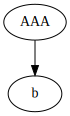

In [ ]:
%%graph
a [label=AAA]
a -> b

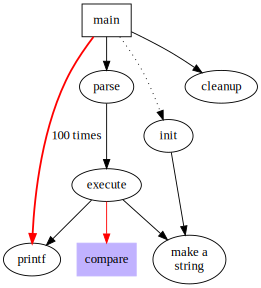

In [ ]:
%%graph
size ="4,4";
main [shape=box]; /* this is a comment */
main -> parse [weight=8];
parse -> execute;
main -> init [style=dotted];
main -> cleanup;
execute -> { make_string; printf}
init -> make_string;
edge [color=red]; // so is this
main -> printf [style=bold,label="100 times"];
make_string [label="make a\nstring"];
node [shape=box,style=filled,color=".7 .3 1.0"];
execute -> compare;

In [ ]:
type(g)

graphviz.files.Source

In [ ]:
g.source

'digraph {a -> b}'

In [ ]:
def source_to_nx(self):
  import networkx as nx
  from io import StringIO
  g = nx.drawing.nx_pydot.read_dot(StringIO(self.source))
  return nx.DiGraph(g)
Source.to_nx = source_to_nx

In [ ]:
G = g.to_nx()

In [ ]:
G.nodes(), G.edges()

(NodeView(('a', 'b')), OutEdgeView([('a', 'b')]))

In [ ]:
list(G.adjacency())

[('a', {'b': {}}), ('b', {})]

# Next

- ลอง pos (graphviz, pydot, backend อื่น)